In [1]:
import piscola as pisco
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as cons
import synphot
import glob

c = cons.c.to(u.AA/u.s).value

$\mathrm{F}^{\mathrm{AB}}_{\mathrm{nu}}=3.631 \times 10^{-20} \mathrm{erg}\, \mathrm{cm}^{-2} \mathrm{s}^{-1} \mathrm{Hz}^{-1}$

$f_{v}=\frac{\lambda^{2}}{c} f_{\lambda}$

$f_{a b}(\lambda)=10^{-48.6 / 2.5} c \lambda^{-2}  \mathrm{erg}\, \mathrm{cm}^{-2} \mathrm{s}^{-1} \mathrm{\mathring{A}} ^{-1}$

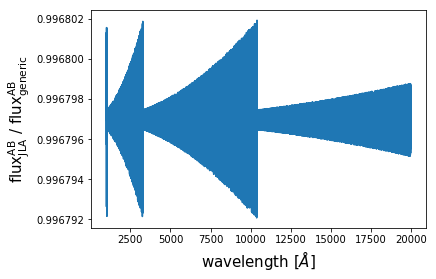

In [47]:
ab_jla_wave, ab_jla_flux = np.loadtxt('test_files/JLA/MagSys/ab-spec.dat').T
ab_wave = ab_jla_wave
ab_flux = 3630.8e-23*c/ab_wave**2

plt.plot(ab_wave, ab_jla_flux/ab_flux)
plt.xlabel(r'wavelength [$\AA$]', fontsize=15)
plt.ylabel(r'flux$^{\rm AB}_{\rm JLA}$ / flux$^{\rm AB}_{\rm generic}$', fontsize=15)
plt.show()

AB - Vega: -0.10844492663446251 mag
AB - Vega: -0.10910428450035167 mag


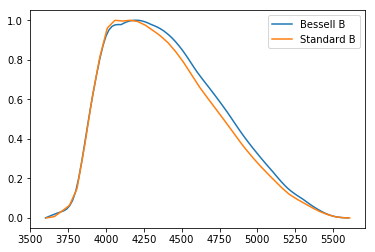

In [48]:
vega_wave, vega_flux = np.loadtxt('test_files/JLA/MagSys/alpha_lyr_stis_005.ascii').T

band = 'B'

wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/Bessell/Bessell_{band}.dat').T
f_ab = pisco.run_filter(ab_wave, ab_flux, wave, trans)
f_vega = pisco.run_filter(vega_wave, vega_flux, wave, trans)
bessell_diff = 2.5*np.log10(f_ab/f_vega)
print('AB - Vega:', bessell_diff, 'mag')

plt.plot(wave, trans, label=f'Bessell {band}')

wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/Standard/Standard_{band}.dat').T
f_ab = pisco.run_filter(ab_wave, ab_flux, wave, trans)
f_vega = pisco.run_filter(vega_wave, vega_flux, wave, trans)
standard_diff = 2.5*np.log10(f_ab/f_vega)
print('AB - Vega:', standard_diff, 'mag')

plt.plot(wave, trans, label=f'Standard {band}')
plt.legend()
plt.show()

In [49]:
bands = ['U', 'B', 'V', 'R', 'I']

filters = 'Bessell'
for band in bands:
    wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/{filters}_{band}.dat').T
    f_ab = pisco.run_filter(ab_wave, ab_flux, wave, trans)
    f_vega = pisco.run_filter(vega_wave, vega_flux, wave, trans)
    filter_diff = 2.5*np.log10(f_ab/f_vega)
    print(f'AB - Vega (Bessell {band}): {filter_diff:.3f} mag')
    
filters = 'Standard'
for band in bands:
    wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/{filters}_{band}.dat').T
    f_ab = pisco.run_filter(ab_wave, ab_flux, wave, trans)
    f_vega = pisco.run_filter(vega_wave, vega_flux, wave, trans)
    filter_diff = 2.5*np.log10(f_ab/f_vega)
    print(f'AB - Vega (Bessell {band}): {filter_diff:.3f} mag')

AB - Vega (Bessell U): 0.789 mag
AB - Vega (Bessell B): -0.108 mag
AB - Vega (Bessell V): 0.009 mag
AB - Vega (Bessell R): 0.197 mag
AB - Vega (Bessell I): 0.440 mag
AB - Vega (Bessell U): 0.876 mag
AB - Vega (Bessell B): -0.109 mag
AB - Vega (Bessell V): 0.005 mag
AB - Vega (Bessell R): 0.191 mag
AB - Vega (Bessell I): 0.437 mag


In [6]:
vega_wave, vega_flux = np.loadtxt('test_files/JLA/MagSys/alpha_lyr_stis_005.ascii').T

bands = ['U', 'B', 'V', 'R', 'I']

for band in bands:
    wave1, trans1 = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/Bessell/Bessell_{band}.dat').T
    wave2, trans2 = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/Standard/Standard_{band}.dat').T
    f1 = pisco.run_filter(vega_wave, vega_flux, wave1, trans1)
    f2 = pisco.run_filter(vega_wave, vega_flux, wave2, trans2)
    mag_diff = 2.5*np.log10(f1/f2)
    print(f'Bessell - Standard ({band}):', mag_diff, 'mag')

Bessell - Standard (U): 0.06029762840770288 mag
Bessell - Standard (B): -0.009992214687354164 mag
Bessell - Standard (V): -0.011058043361491982 mag
Bessell - Standard (R): -0.01803316166702874 mag
Bessell - Standard (I): -0.00633537340885284 mag


___
___
___

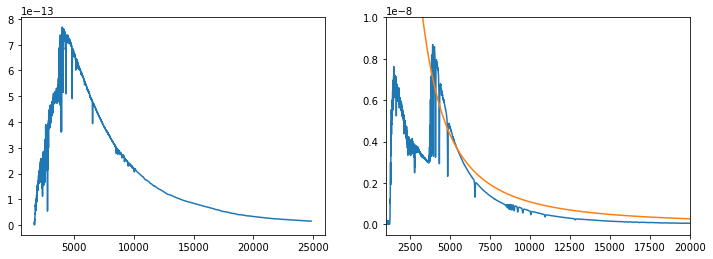

BD+17 mag in Bessell system:

Bessell_U: 10.467 mag (AB), 9.678 mag (Vega), 0.789 (delta)
Bessell_I: 9.246 mag (AB), 8.806 mag (Vega), 0.440 (delta)
Bessell_B: 9.763 mag (AB), 9.871 mag (Vega), -0.108 (delta)
Bessell_V: 9.447 mag (AB), 9.438 mag (Vega), 0.009 (delta)
Bessell_R: 9.323 mag (AB), 9.126 mag (Vega), 0.197 (delta)


In [74]:
bd_wave, bd_flux = np.loadtxt('test_files/seds/bd_17d4708_stisnic_002.dat').T
vega_wave, vega_flux = np.loadtxt('test_files/seds/alpha_lyr_stis_005.dat').T
ab_wave = np.arange(1000, 20000, 1)
ab_flux = 3630.8e-23*c/ab_wave**2

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(bd_wave, bd_flux)
ax[1].plot(vega_wave, vega_flux)
ax[1].plot(ab_wave, ab_flux)
ax[1].set_xlim(1000, 20000)
ax[1].set_ylim(-5e-10, 1e-8)
plt.show()

filters = 'Bessell' 
files = [file for file in glob.glob(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/*.dat')]
bands = [file.split('/')[-1][:-4] for file in files]

bands_bd17flux = {band:None for band in bands}
bands_abflux = {band:None for band in bands}
bands_vegaflux = {band:None for band in bands}
bands_abmag = {band:None for band in bands}
bands_vegamag = {band:None for band in bands}

print(f'BD+17 mag in {filters} system:\n')
for band in bands:
    
    wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/{band}.dat').T
    f_bd17 = pisco.run_filter(bd_wave, bd_flux, wave, trans)
    bands_bd17flux[band] = f_bd17
    
    f_ab = pisco.run_filter(ab_wave, ab_flux, wave, trans)
    bands_abflux[band] = f_ab
    
    f_vega = pisco.run_filter(vega_wave, vega_flux, wave, trans)
    bands_vegaflux[band] = f_vega
    
    mag_ab = -2.5*np.log10(f_bd17/f_ab)
    bands_abmag[band] = mag_ab
    
    mag_vega = -2.5*np.log10(f_bd17/f_vega)
    bands_vegamag[band] = mag_vega
    
    print(f'{band}: {mag_ab:.3f} mag (AB), {mag_vega:.3f} mag (Vega), {mag_ab-mag_vega:.3f} (delta)')

In [32]:
band = 'p1_U'
wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/{band}.dat').T

Area = np.trapz(trans, wave)
mean = np.average(wave, weights=trans)

f_snana = 6.310e+01/Area * synphot.units.PHOTLAM
f_snana = synphot.units.convert_flux(mean, f_snana, synphot.units.FLAM)

f1 = bands_flux[band]*synphot.units.FLAM

mag_diff = 2.5*np.log10(f1/f_snana)

print(f'{f1.value:.3e}, {f_snana.value:.3e}, {mag_diff:.3f}')

print(f'{band}: {bands_abmag[band]:.3f} mag (AB), {bands_vegamag[band]:.3f} mag (Vega)')

5.486e-13, 5.502e-13, -0.003
p1_U: 10.462 mag (AB), 9.700 mag (Vega)


___

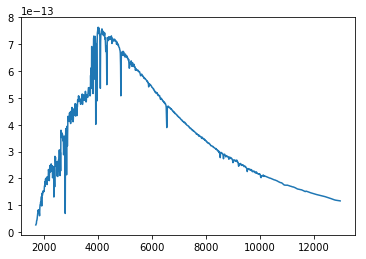

BD+17 mag in Megacam system:

Megacam_i: 9.261 mag (AB), 8.867 mag (Vega), 0.394 (delta)
Megacam_y: 9.264 mag (AB), 8.890 mag (Vega), 0.374 (delta)
Megacam_u: 10.283 mag (AB), 9.815 mag (Vega), 0.468 (delta)
Megacam_g: 9.605 mag (AB), 9.696 mag (Vega), -0.091 (delta)
Megacam_z: 9.256 mag (AB), 8.697 mag (Vega), 0.559 (delta)
Megacam_r: 9.349 mag (AB), 9.185 mag (Vega), 0.163 (delta)


In [76]:
bd_wave, bd_flux = np.loadtxt('test_files/seds/bd_17d4708_stisnic_005.dat').T
vega_wave, vega_flux = np.loadtxt('test_files/seds/alpha_lyr_stis_005.dat').T
#ab_wave, ab_flux = np.loadtxt('test_files/JLA/MagSys/ab-spec.dat').T

plt.plot(bd_wave, bd_flux)
plt.show()

filters = 'Megacam' 
files = [file for file in glob.glob(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/*.dat')]
bands = [file.split('/')[-1][:-4] for file in files]

bands_bd17flux = {band:None for band in bands}
bands_abflux = {band:None for band in bands}
bands_vegaflux = {band:None for band in bands}
bands_abmag = {band:None for band in bands}
bands_vegamag = {band:None for band in bands}

print(f'BD+17 mag in {filters} system:\n')
for band in bands:
    
    wave, trans = np.loadtxt(f'/home/tem1u17/piscola/src/piscola/filters/{filters}/{band}.dat').T
    f_bd17 = pisco.run_filter(bd_wave, bd_flux, wave, trans)
    bands_bd17flux[band] = f_bd17
    
    f_ab = pisco.run_filter(ab_wave, ab_flux, wave, trans)
    bands_abflux[band] = f_ab
    
    f_vega = pisco.run_filter(vega_wave, vega_flux, wave, trans)
    bands_vegaflux[band] = f_vega
    
    mag_ab = -2.5*np.log10(f_bd17/f_ab)
    bands_abmag[band] = mag_ab
    
    mag_vega = -2.5*np.log10(f_bd17/f_vega)
    bands_vegamag[band] = mag_vega
    
    print(f'{band}: {mag_ab:.3f} mag (AB), {mag_vega:.3f} mag (Vega), {mag_ab-mag_vega:.3f} (delta)')